In [47]:

#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
#Import Label encoder Library
from sklearn import preprocessing
#Import feature selection Library
#import statsmodels.api as sm
#Import the train test split Library from sklearn
from sklearn.model_selection import train_test_split
#Import the metrixs for evaluating the model performance
from sklearn.metrics import classification_report
#scaling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
import seaborn as sns
from sklearn.neural_network import MLPClassifier


In [48]:
dataset = pd.read_csv ("BankChurners.csv")

#dataset.columns.values[-1] = 'classification'
dataset

#cleaning
#if any coloumn has null value
dataset.isna().sum()

#if we have duplicated rows (boolean)
dataset.duplicated().any()

#one hot/label encoding
#categorial(object) to numerical
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 2998 non-null   int64  
 1   Attrition_Flag            2998 non-null   object 
 2   Customer_Age              2998 non-null   int64  
 3   Gender                    2998 non-null   object 
 4   Dependent_count           2998 non-null   int64  
 5   Education_Level           2998 non-null   object 
 6   Marital_Status            2998 non-null   object 
 7   Income_Category           2998 non-null   object 
 8   Card_Category             2998 non-null   object 
 9   Months_on_book            2998 non-null   int64  
 10  Total_Relationship_Count  2998 non-null   int64  
 11  Months_Inactive_12_mon    2998 non-null   int64  
 12  Contacts_Count_12_mon     2998 non-null   int64  
 13  Credit_Limit              2998 non-null   float64
 14  Total_Re

In [49]:

#separate them in two dataframes
numerical = dataset.select_dtypes(exclude=['object','bool'])
categorical = dataset.select_dtypes (include=['object','bool'])


numerical.head()

categorical.head()

le= preprocessing.LabelEncoder()
label_encoded_categorical = categorical.apply(le.fit_transform)
label_encoded_categorical.head()

#combine them again by concatenation func
df=pd.concat([numerical, label_encoded_categorical], axis=1)
df.head()


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,classification
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,...,1.625,0.061,0.000093,1,1,3,1,2,0,1
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,...,3.714,0.105,0.000057,1,0,2,2,4,0,1
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,...,2.333,0.000,0.000021,1,1,2,1,3,0,1
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,...,2.333,0.760,0.000134,1,0,3,3,4,0,1
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,...,2.500,0.000,0.000022,1,1,5,1,2,0,1


In [43]:
#feature selection
x= df.drop(['classification'], axis=1)
y= df.classification

#split_dataset_into_test_and_train
X_train, X_test, y_train, y_test = train_test_split(x, y,
    test_size=0.20, shuffle = True, random_state = 2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train
X_test


array([[-0.7312455 ,  1.67200087, -1.61777923, ...,  0.96569194,
         1.56984074, -0.21151394],
       [-0.62500133,  1.15845499, -0.08197773, ..., -0.5216101 ,
        -1.78830207, -0.21151394],
       [ 2.14566641, -2.02552945, -1.61777923, ...,  0.96569194,
         0.89821218, -0.21151394],
       ...,
       [-0.79791761, -0.89572852,  0.68592302, ...,  0.96569194,
        -0.44504495, -0.21151394],
       [-0.68291196,  1.77471004, -0.08197773, ..., -0.5216101 ,
        -1.11667351, -0.21151394],
       [-0.73234573,  1.77471004, -0.84987848, ..., -0.5216101 ,
         0.89821218, -0.21151394]])

In [50]:
SVCModel = SVC(C=0.2, kernel='linear', degree=19, gamma='auto', shrinking=False,
                probability=True, tol=0.001, cache_size=200, class_weight=None,verbose=False,
                max_iter=-1, random_state =40
)
SVCModel.fit(X_train, y_train) # train

y_pred = SVCModel.predict(X_test) # validate

AccScore = accuracy_score(y_test, y_pred) 
print('Accuracy Score is : ', AccScore)


Accuracy Score is :  0.975


[[ 35   1]
 [ 14 550]]
              precision    recall  f1-score   support

           0       0.71      0.97      0.82        36
           1       1.00      0.98      0.99       564

    accuracy                           0.97       600
   macro avg       0.86      0.97      0.91       600
weighted avg       0.98      0.97      0.98       600



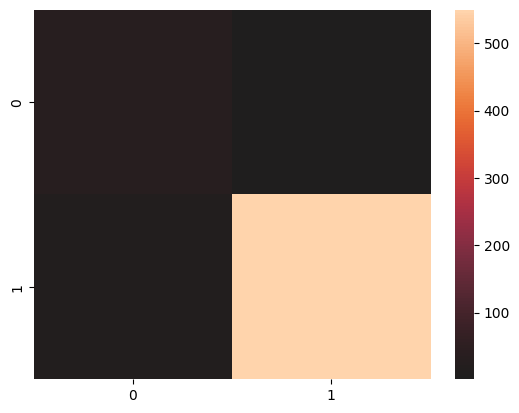

In [51]:
cm=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
# drawing confusion matrix
sns.heatmap(cm, center = True)
plt.show()


In [52]:

fscore=f1_score(y_test, y_pred)
print('f1-score is :',fscore)

#Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))   1 / 1+2  
#recall_score(y_test, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)

RecallScore = recall_score(y_test, y_pred) #it can be : binary,macro,weighted,samples
print('Recall Score is : ', RecallScore)

#Calculating Precision Score : (Specificity) #(TP / float(TP + FP))  
#precision_score(y_test, y_pred, labels=None, pos_label=1, average='binary',sample_weight=None)

PrecisionScore = precision_score(y_test, y_pred) #it can be : binary,macro,weighted,samples
print('Precision Score is : ', PrecisionScore)

AccScore = accuracy_score(y_test, y_pred)
print('Accuracy Score is : ', AccScore)


f1-score is : 0.9865470852017937
Recall Score is :  0.975177304964539
Precision Score is :  0.9981851179673321
Accuracy Score is :  0.975


AUC Value  :  0.9736997635933806


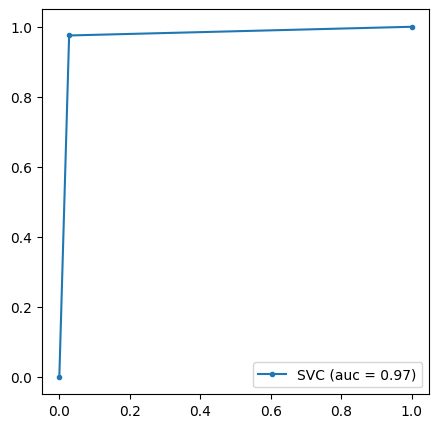

In [53]:
#Calculating ROC:  
#roc_curve(y_test, y_pred, pos_label=None, sample_weight=None,drop_intermediate=True)
#Calculating ROC AUC Score:  
#roc_auc_score(y_true, y_score, average=’macro’, sample_weight=None,max_fpr=None)

#ROCAUCScore = roc_auc_score(y_test,y_pred, average='micro') #it can be : macro,weighted,samples
#print('ROCAUC Score : ', ROCAUCScore)
fprValue, tprValue, thresholdsValue = roc_curve(y_test,y_pred)
AUCValue = auc(fprValue, tprValue)
#Calculating Area Under the Curve AUC : 
print('AUC Value  : ', AUCValue)
plt.show()
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fprValue,tprValue, marker='.', label='SVC (auc = %0.2f)' % AUCValue)
plt.legend()
plt.show()


[0.32515680834964966, 0.22882574852389684, 0.17238418932663252, 0.1393549833200505, 0.1190633764861949, 0.10598841480858051, 0.09702161909801739, 0.09023544110288516, 0.08541571484862616, 0.0813562896331108, 0.07787387456392195, 0.07520076383135856, 0.07271456064658795]


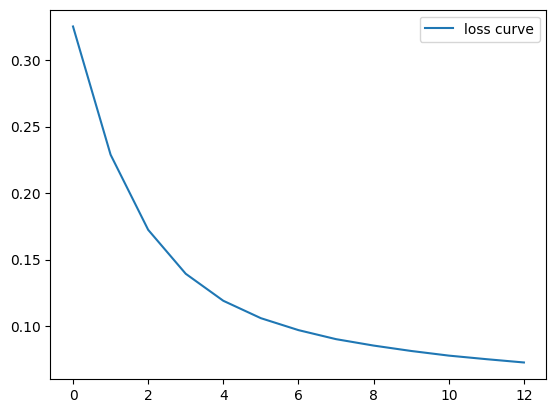

In [54]:

SVCModel = MLPClassifier(#hidden_layer_sizes=(32, 32),
              activation='relu',
              solver='adam',
              learning_rate='adaptive',
              early_stopping=True)
SVCModel.fit(X_train,y_train)
test_acc = accuracy_score(y_test, y_pred) * 100.
loss_values = SVCModel.loss_curve_
print (loss_values)
plt.plot(loss_values,label='loss curve')
plt.legend()
plt.show()

C:\Users\Ziad Mazhar\AppData\Local\Temp\ipykernel_2612\1305707256.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none' )


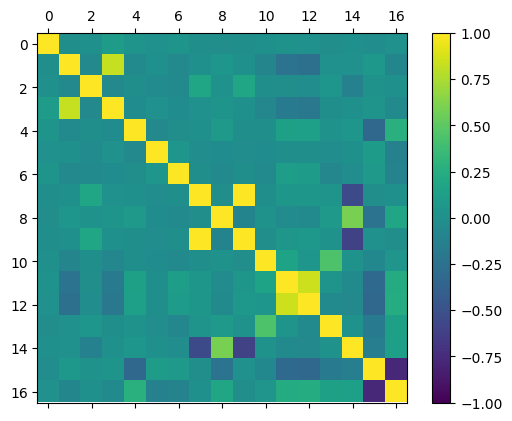

In [55]:
from matplotlib import pyplot
#correlation between features
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none' )
fig.colorbar(cax)
pyplot.show()